<a href="https://colab.research.google.com/github/anajikadam17/Google-Colab/blob/main/CNN/Image_classification_using_CNN_CIFAR10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Small Image Classification Using Convolutional Neural Network (CNN)
In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

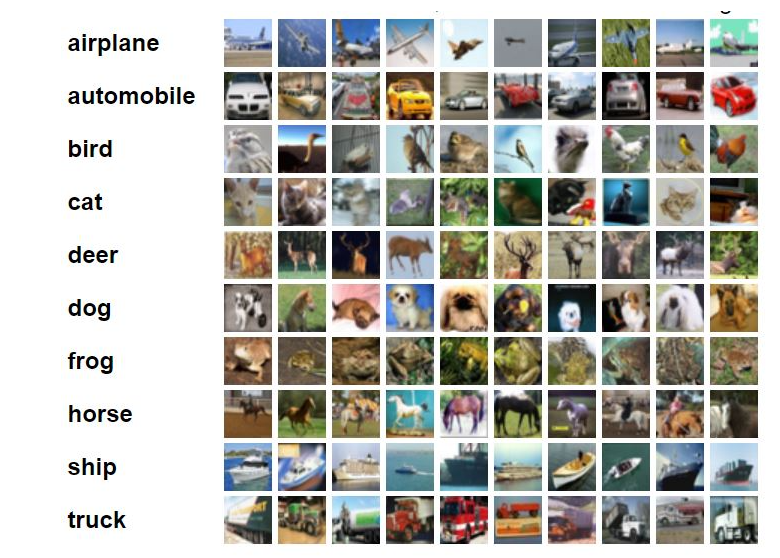

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load the dataset
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:

# y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

[CIFAR10 ](https://www.cs.toronto.edu/~kriz/cifar.html)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

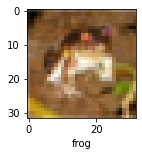

In [ ]:
plot_sample(X_train, y_train, 0)

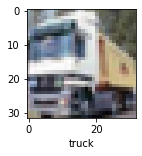

In [ ]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [ ]:
# Normalizing the training data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# after normalization
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

Build simple artificial neural network for image classification

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 8s 3ms/step - loss: 1.8109 - accuracy: 0.3521
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6217 - accuracy: 0.4288
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5399 - accuracy: 0.4574
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4818 - accuracy: 0.4789
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4312 - accuracy: 0.4971


You can see that at the end of 5 epochs, accuracy is at around 49%

In [ ]:

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.49      0.53      1000
           1       0.79      0.34      0.47      1000
           2       0.27      0.57      0.37      1000
           3       0.42      0.19      0.26      1000
           4       0.56      0.18      0.27      1000
           5       0.35      0.49      0.41      1000
           6       0.40      0.68      0.51      1000
           7       0.59      0.48      0.53      1000
           8       0.63      0.60      0.61      1000
           9       0.56      0.58      0.57      1000

    accuracy                           0.46     10000
   macro avg       0.52      0.46      0.45     10000
weighted avg       0.52      0.46      0.45     10000



Now let us build a convolutional neural network to train our images

In [ ]:

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 34s 3ms/step - loss: 1.5100 - accuracy: 0.4577
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1611 - accuracy: 0.5894
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0320 - accuracy: 0.6393
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9538 - accuracy: 0.6669
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8984 - accuracy: 0.6889
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8513 - accuracy: 0.7050
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8135 - accuracy: 0.7188
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7787 - accuracy: 0.7291
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7471 - accuracy: 0.7401
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.71

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features


In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9416 - accuracy: 0.6797


[0.9415791034698486, 0.6797000169754028]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.9741789e-03, 2.5200056e-06, 3.1146059e-02, 7.3541081e-01,
        7.7764870e-04, 6.8678297e-02, 2.5864441e-02, 4.4118769e-05,
        1.3605686e-01, 4.5027868e-05],
       [3.7227087e-02, 1.0755781e-01, 7.3361468e-07, 2.0648386e-06,
        5.5572048e-07, 1.4124269e-08, 5.2244400e-07, 9.2035111e-07,
        8.5405862e-01, 1.1516927e-03],
       [1.2599126e-02, 1.1673816e-02, 8.1347546e-04, 3.8162281e-03,
        1.0709654e-03, 4.2779621e-04, 1.7499454e-04, 1.8281433e-04,
        9.5775408e-01, 1.1486742e-02],
       [9.7019345e-01, 2.6084848e-03, 3.4489708e-03, 2.3987638e-04,
        3.3352007e-03, 6.9697302e-07, 2.0399837e-05, 7.2065377e-05,
        1.9690661e-02, 3.9017849e-04],
       [1.9758938e-06, 6.4963234e-07, 5.1165666e-02, 1.4065783e-02,
        4.3990970e-01, 1.2039325e-03, 4.9362314e-01, 1.9935912e-06,
        2.7081558e-05, 4.6163173e-08]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
a = [1,2,3,4]
b= np.argmax(a)
a[b]

4

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

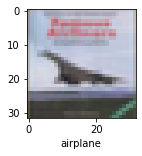

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:

classes[y_classes[3]]

'airplane'

In [ ]:
classes[y_classes[8]]

'cat'